# Examining predictions

The purpose of this notebook is to look at the predictions different models are making, and see where they are performing well and poorly. Hopefully this can start to illuminate what it is they're learning.

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from pathlib import Path

## Helper functions

In [101]:
base_dir = Path('../Code/')

def load_preds(n_units):
    correct_fname = Path(f'basic_addition_2term_2dig_{n_units}units_correct.csv')
    incorrect_fname = Path(f'basic_addition_2term_2dig_{n_units}units_incorrect.csv')\
    
    correct_df = pd.read_csv(base_dir / correct_fname)
    incorrect_df = pd.read_csv(base_dir / incorrect_fname)
    
    correct_df['X_true_1'], correct_df['X_true_2'] = correct_df['X_true'].str.split('+', 1).str
    incorrect_df['X_true_1'], incorrect_df['X_true_2'] = incorrect_df['X_true'].str.split('+', 1).str
    
    correct_df['X_true_1'] = pd.to_numeric(correct_df['X_true_1'])
    correct_df['X_true_2'] = pd.to_numeric(correct_df['X_true_2'])
    
    incorrect_df['X_true_1'] = pd.to_numeric(incorrect_df['X_true_1'])
    incorrect_df['X_true_2'] = pd.to_numeric(incorrect_df['X_true_2'])
    
    return correct_df, incorrect_df

def symmetric_df(df):
    x1 = df[['X_true_1', 'X_true_2']]
    x2 = x1.copy()
    x2.columns = ['X_true_2', 'X_true_1']
    symmetric_df = pd.merge(x1, x2, on=['X_true_1', 'X_true_2'], how='inner')
    return symmetric_df

def summarize(correct_df, incorrect_df, symmetric_correct_df=None, symmetric_incorrect_df=None):
    num_rows = correct_df.shape[0] + incorrect_df.shape[0]
    print(f'Correct: {100*correct_df.shape[0] / num_rows:.2f}%')
    print(f'Incorrect: {100*incorrect_df.shape[0] / num_rows:.2f}%')
    print('-'*20)
    print('Correct analysis:')
    print(f'Distinct first numbers: {correct_df["X_true_1"].nunique()}')
    print(f'Distinct second numbers: {correct_df["X_true_2"].nunique()}')
    print(f'Overlapping first and second numbers: {len(set(correct_df["X_true_1"]).intersection(set(correct_df["X_true_2"])))}')
    print(f'Single digits (first): {correct_df[correct_df["X_true_1"] < 10]["X_true_1"].unique()}')
    print(f'Single digits (second): {correct_df[correct_df["X_true_2"] < 10]["X_true_2"].unique()}')
    if symmetric_correct_df is not None:
        print(f'Percent symmetric: {100*symmetric_correct_df.shape[0] / correct_df.shape[0]:.2f}%')
    
    print('-'*20)
    print('Incorrect analysis:')
    print(f'Distinct first numbers: {incorrect_df["X_true_1"].nunique()}')
    print(f'Distinct second numbers: {incorrect_df["X_true_2"].nunique()}')
    print(f'Overlapping first and second numbers: {len(set(incorrect_df["X_true_1"]).intersection(set(incorrect_df["X_true_2"])))}')
    print(f'Single digits (first): {incorrect_df[incorrect_df["X_true_1"] < 10]["X_true_1"].unique()}')
    print(f'Single digits (second): {incorrect_df[incorrect_df["X_true_2"] < 10]["X_true_2"].unique()}')
    if symmetric_incorrect_df is not None:
        print(f'Percent symmetric: {100*symmetric_incorrect_df.shape[0] / incorrect_df.shape[0]:.2f}%')
    
    fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(20, 12))
    ax1.hist(correct_df['X_true_1'], density=True, alpha=0.35, label='Correct')
    ax1.hist(incorrect_df['X_true_1'], density=True, alpha=0.35, color='red', label='Incorrect')
    ax2.hist(correct_df['X_true_2'], density=True, alpha=0.35, label='Correct')
    ax2.hist(incorrect_df['X_true_2'], density=True, alpha=0.35, color='red', label='Incorrect')
    start, end = ax1.get_xlim()
    ax1.xaxis.set_ticks(np.arange(start, end, 5))
    ax2.xaxis.set_ticks(np.arange(start, end, 5))
    ax1.set_title('First num')
    ax2.set_title('Second num')
    ax1.legend()
    ax2.legend();

## 2 terms, 2 digits

These are the results of `correct_incorrect_preds.py` with the model described above (non-reversed).

### 1 hidden unit

### 2 hidden units

### 4 hidden units

### 8 hidden units

In [26]:
correct8_df, incorrect8_df = load_preds(8)

<ipython-input-25-1421cf0efecf>:10: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  correct_df['X_true_1'], correct_df['X_true_2'] = correct_df['X_true'].str.split('+', 1).str
<ipython-input-25-1421cf0efecf>:11: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  incorrect_df['X_true_1'], incorrect_df['X_true_2'] = incorrect_df['X_true'].str.split('+', 1).str


In [83]:
symmetric_correct8_df = symmetric_df(correct8_df)
symmetric_incorrect8_df = symmetric_df(incorrect8_df)

Correct: 27.74%
Incorrect: 72.26%
--------------------
Correct analysis:
Distinct first numbers: 100
Distinct second numbers: 100
Overlapping first and second numbers: 100
Single digits (first): [0 1 2 3 4 5 6 7 8 9]
Single digits (second): [9 8 7 5 3 6 4 2 1 0]
Percent symmetric: 63.77%
--------------------
Incorrect analysis:
Distinct first numbers: 100
Distinct second numbers: 100
Overlapping first and second numbers: 100
Single digits (first): [0 1 2 3 4 5 6 7 8 9]
Single digits (second): [0 1 2 3 4 5 6 7 8 9]
Percent symmetric: 86.09%


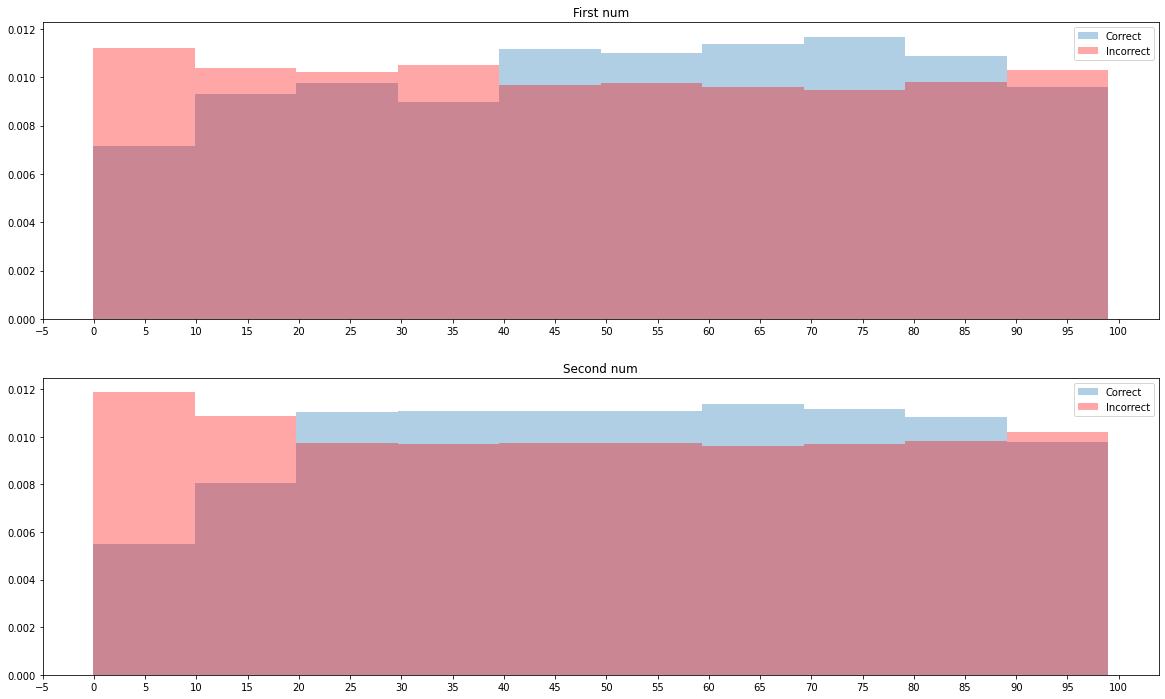

In [102]:
summarize(correct8_df, incorrect8_df, symmetric_correct8_df, symmetric_incorrect8_df)

### 16 hidden units

In [95]:
correct16_df, incorrect16_df = load_preds(16)

<ipython-input-93-167b4df8e4ea>:10: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  correct_df['X_true_1'], correct_df['X_true_2'] = correct_df['X_true'].str.split('+', 1).str
<ipython-input-93-167b4df8e4ea>:11: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  incorrect_df['X_true_1'], incorrect_df['X_true_2'] = incorrect_df['X_true'].str.split('+', 1).str


In [96]:
symmetric_correct16_df = symmetric_df(correct16_df)
symmetric_incorrect16_df = symmetric_df(incorrect16_df)

Correct: 45.42%
Incorrect: 54.58%
--------------------
Correct analysis:
Distinct first numbers: 100
Distinct second numbers: 100
Overlapping first and second numbers: 100
Single digits (first): [0 1 2 3 4 5 6 7 8 9]
Single digits (second): [8 9 5 7 4 3 2 1 6 0]
Percent symmetric: 71.75%
--------------------
Incorrect analysis:
Distinct first numbers: 100
Distinct second numbers: 100
Overlapping first and second numbers: 100
Single digits (first): [0 1 2 3 4 5 6 7 8 9]
Single digits (second): [0 1 2 3 4 5 6 7 9 8]
Percent symmetric: 76.49%


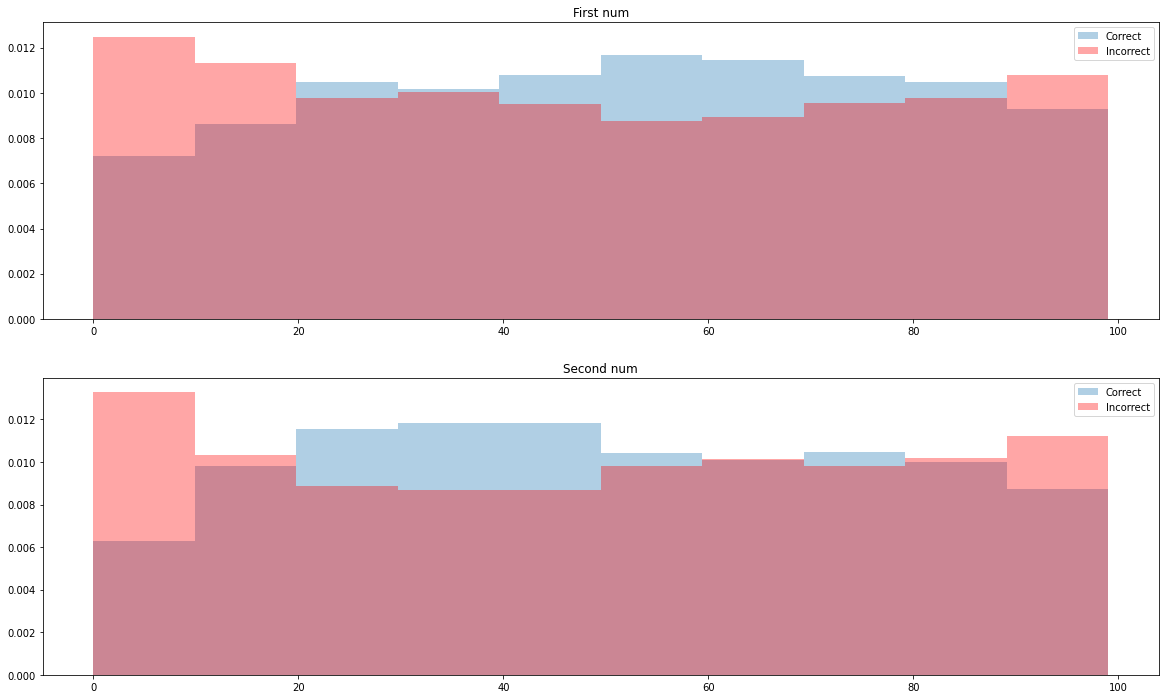

In [97]:
summarize(correct16_df, incorrect16_df, symmetric_correct16_df, symmetric_incorrect16_df)

### 32 hidden units

In [98]:
correct32_df, incorrect32_df = load_preds(32)

<ipython-input-93-167b4df8e4ea>:10: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  correct_df['X_true_1'], correct_df['X_true_2'] = correct_df['X_true'].str.split('+', 1).str
<ipython-input-93-167b4df8e4ea>:11: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  incorrect_df['X_true_1'], incorrect_df['X_true_2'] = incorrect_df['X_true'].str.split('+', 1).str


In [99]:
symmetric_correct32_df = symmetric_df(correct32_df)
symmetric_incorrect32_df = symmetric_df(incorrect32_df)

Correct: 5.89%
Incorrect: 94.11%
--------------------
Correct analysis:
Distinct first numbers: 97
Distinct second numbers: 100
Overlapping first and second numbers: 97
Single digits (first): [0 1 2 3 4 5 6 7 8 9]
Single digits (second): [2 5 8 0 4 9 3 6 1 7]
Percent symmetric: 41.43%
--------------------
Incorrect analysis:
Distinct first numbers: 100
Distinct second numbers: 100
Overlapping first and second numbers: 100
Single digits (first): [0 1 2 3 4 5 6 7 8 9]
Single digits (second): [0 1 3 4 6 7 9 2 5 8]
Percent symmetric: 96.33%


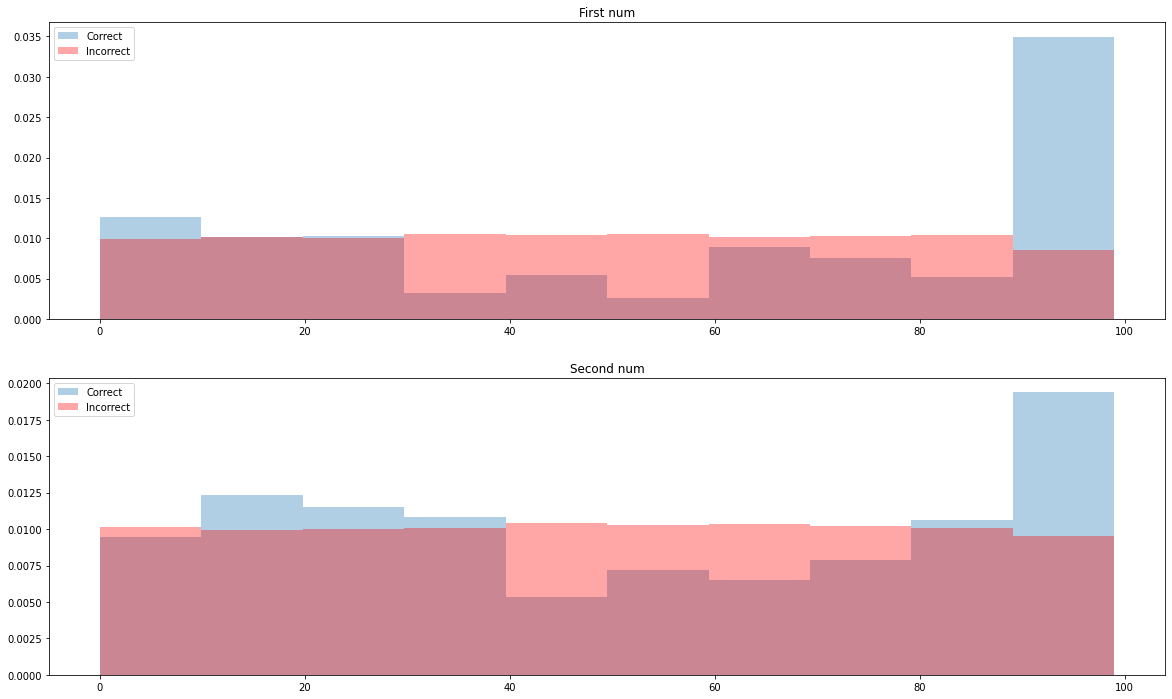

In [100]:
summarize(correct32_df, incorrect32_df, symmetric_correct32_df, symmetric_incorrect32_df)

### 64 hidden units